In [1]:
# No parameters required

# Notebook to assess diversity bottlenecks

## Import libraries

In [2]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Specify paths

In [3]:
preruns_path = '../../pre/freq_libraries/'
mainrun_path = '../../results/df/distribution_freq/'
graph_outpath = '../graphs/'

## Import data from pre-runs

In [4]:
df_list = []

for f in glob.glob(f"{preruns_path}/*"):
    print(f)
    df = pd.read_csv(f)
    gby = (
        df[df.confidence_score == 1
           ].groupby(["Sample_name", "Replicate", "aa_seq", "Nham_aa"])["frequency"]
      .median()
      .groupby(level=["Sample_name", "aa_seq", "Nham_aa"])
      .median()
      .reset_index(name="frequency_initial")
    )
    split_data = gby['Sample_name'].str.split('-', n=1, expand=True)
    gby['library'] = split_data[0].str[0].map({'S': 'NNK', 'O': 'ortho'})
    gby['locus'] = split_data[1]
    df_list.append(gby[["library", "locus", "aa_seq", "Nham_aa", "frequency_initial"]])

preruns_df = pd.concat(df_list, ignore_index=True)
preruns_df

../../pre/freq_libraries/freq_BY4741__FKS1__HS1__FKS1-HS1.csv
../../pre/freq_libraries/freq_BY4741__FKS2__HS1__FKS2-HS1.csv
../../pre/freq_libraries/freq_BY4741__FKS2__HS2__FKS2-HS2.csv
../../pre/freq_libraries/freq_BY4741__FKS1__HS1__FKS1-HS1__ortho.csv
../../pre/freq_libraries/freq_BY4741__FKS2__HS1__FKS2-HS1__ortho.csv
../../pre/freq_libraries/freq_BY4741__FKS2__HS2__FKS2-HS2__ortho.csv
../../pre/freq_libraries/freq_BY4741__FKS1__HS2__FKS1-HS2__ortho.csv
../../pre/freq_libraries/freq_BY4741__FKS1__HS2__FKS1-HS2.csv
../../pre/freq_libraries/freq_BY4741__FKS1__HS3__FKS1-HS3.csv
../../pre/freq_libraries/freq_BY4741__FKS1__HS3__FKS1-HS3__ortho.csv


,library,locus,aa_seq,Nham_aa,frequency_initial
0,NNK,FKS1-HS1,*LVLSLRDP,1,0.006981
1,NNK,FKS1-HS1,ALVLSLRDP,1,0.007182
2,NNK,FKS1-HS1,CLVLSLRDP,1,0.003702
3,NNK,FKS1-HS1,DLVLSLRDP,1,0.003769
4,NNK,FKS1-HS1,ELVLSLRDP,1,0.006267
...,...,...,...,...,...
2034,ortho,FKS1-HS3,LDTYMWYIILN,2,0.000593
2035,ortho,FKS1-HS3,LDTYMWYILCN,3,0.000494
2036,ortho,FKS1-HS3,LDTYMWYIVCN,3,0.001012
2037,ortho,FKS1-HS3,MDIQIWYAIYS,7,0.000839


## Import data for T0 libraries

In [5]:
df_list = []

for f in glob.glob(f"{mainrun_path}/freq_BY4741__*__none*"):
    print(f)
    df = pd.read_csv(f)
    gby = (
         df[(df.Timepoint == "T0") & (df.confidence_score == 1)
            ].groupby(["Sample attributes", "Replicate", "aa_seq", "Nham_aa"])["frequency"]
      .median()
      .groupby(level=["Sample attributes", "aa_seq", "Nham_aa"])
      .median()
      .reset_index()
    )
    gby['locus'] = gby['Sample attributes'].str.split('__', expand=True)[3]
    if "_ortho" in f:
        gby['library'] = "ortho"
    else:
        gby['library'] = "NNK"
    df_list.append(gby[["library", "locus", "aa_seq", "Nham_aa", "frequency"]])

mainrun_df = pd.concat(df_list, ignore_index=True)
mainrun_df

../../results/df/distribution_freq/freq_BY4741__FKS2__HS1__FKS2-HS1__none__ortho.csv
../../results/df/distribution_freq/freq_BY4741__FKS1__HS2__FKS1-HS2__none__ortho.csv


../../results/df/distribution_freq/freq_BY4741__FKS2__HS2__FKS2-HS2__none__ortho.csv
../../results/df/distribution_freq/freq_BY4741__FKS1__HS1__FKS1-HS1__none__ortho.csv
../../results/df/distribution_freq/freq_BY4741__FKS1__HS1__FKS1-HS1__none.csv
../../results/df/distribution_freq/freq_BY4741__FKS2__HS1__FKS2-HS1__none.csv
../../results/df/distribution_freq/freq_BY4741__FKS1__HS3__FKS1-HS3__none__ortho.csv
../../results/df/distribution_freq/freq_BY4741__FKS1__HS3__FKS1-HS3__none.csv
../../results/df/distribution_freq/freq_BY4741__FKS2__HS2__FKS2-HS2__none.csv
../../results/df/distribution_freq/freq_BY4741__FKS1__HS2__FKS1-HS2__none.csv


,library,locus,aa_seq,Nham_aa,frequency
0,ortho,FKS2-HS1,LALNLSDS,4,0.000470
1,ortho,FKS2-HS1,LALSFKDP,3,0.000574
2,ortho,FKS2-HS1,LALSFRDA,3,0.001340
3,ortho,FKS2-HS1,LALSFRDP,2,0.001505
4,ortho,FKS2-HS1,LALSIRDP,2,0.001409
...,...,...,...,...,...
1015,NNK,FKS1-HS2,PWVRRYTL,1,0.010472
1016,NNK,FKS1-HS2,RWVRRYTL,1,0.004380
1017,NNK,FKS1-HS2,TWVRRYTL,1,0.005752
1018,NNK,FKS1-HS2,VWVRRYTL,1,0.001001


In [6]:
corrdf = pd.merge(left=preruns_df, right=mainrun_df, how="outer", indicator="Location")
corrdf["Nham_aa"] = corrdf["Nham_aa"].map(lambda x: "> 1" if x > 1 else x)
corrdf

,library,locus,aa_seq,Nham_aa,frequency_initial,frequency,Location
0,NNK,FKS1-HS1,*LVLSLRDP,1,0.006981,0.001357,both
1,NNK,FKS1-HS1,ALVLSLRDP,1,0.007182,0.001718,both
2,NNK,FKS1-HS1,CLVLSLRDP,1,0.003702,NaN,left_only
3,NNK,FKS1-HS1,DLVLSLRDP,1,0.003769,0.002120,both
4,NNK,FKS1-HS1,ELVLSLRDP,1,0.006267,0.000965,both
...,...,...,...,...,...,...,...
2036,ortho,FKS2-HS2,NWVWRCVI,> 1,0.000419,NaN,left_only
2037,ortho,FKS2-HS2,NWVYRCII,> 1,0.000331,NaN,left_only
2038,ortho,FKS2-HS2,QWIKRCII,> 1,0.000496,0.001132,both
2039,ortho,FKS2-HS2,RWIKRCII,> 1,0.000479,0.000768,both


In [7]:
ratios = corrdf.groupby(["library", "locus"]).apply(
    lambda df: (df[df["Location"] == "both"]["aa_seq"].nunique() / df["aa_seq"].nunique())
).reset_index(name="proportion")
# Get mapping for annotation below
ratio_dict = ratios.set_index(['library', 'locus'])['proportion'].to_dict()
ratios

/tmp/ipykernel_98583/344109450.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = corrdf.groupby(["library", "locus"]).apply(


,library,locus,proportion
0,NNK,FKS1-HS1,0.950276
1,NNK,FKS1-HS2,0.670807
2,NNK,FKS1-HS3,0.809955
3,NNK,FKS2-HS1,0.981366
4,NNK,FKS2-HS2,0.881988
5,ortho,FKS1-HS1,0.980000
6,ortho,FKS1-HS2,0.631579
7,ortho,FKS1-HS3,1.000000
8,ortho,FKS2-HS1,1.000000
9,ortho,FKS2-HS2,0.761905


/tmp/ipykernel_98583/1016571543.py:14: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  fig = sns.displot(corrdf, x='frequency_initial', y='frequency',


/tmp/ipykernel_98583/1016571543.py:14: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  fig = sns.displot(corrdf, x='frequency_initial', y='frequency',
/tmp/ipykernel_98583/1016571543.py:14: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  fig = sns.displot(corrdf, x='frequency_initial', y='frequency',
/tmp/ipykernel_98583/1016571543.py:14: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  fig = sns.displot(corrdf, x='frequency_initial', y='frequency',
/tmp/ipykernel_98583/1016571543.py:14: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  fig = sns.displot(corrdf, x='frequency_initial', y='frequency',
/tmp/ipykernel_98583/1016571543.py:14: UserWarning: KDE cannot be estimated (0 v

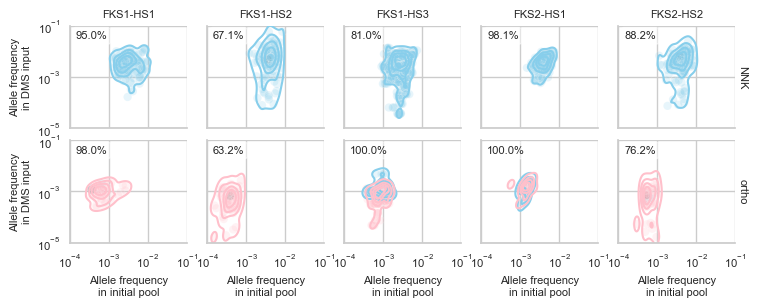

In [8]:
Nham_aa_colors = ['black', 'skyblue', 'pink']
Nham_aa_levels = [0, 1, "> 1"]
Nham_aa_palette = dict(zip(Nham_aa_levels, Nham_aa_colors))

sns.set_theme(rc = {
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':1, 'ytick.major.pad':1,
             },
       style='whitegrid')

fig = sns.displot(corrdf, x='frequency_initial', y='frequency',
                  row="library", col="locus", #col_wrap=3,
                  kind="kde",
                  hue='Nham_aa', palette=Nham_aa_palette, common_norm=False,
                  height=1.5,
                  levels=5, log_scale=True, legend=False,
                  facet_kws=dict(margin_titles=True)
                  )

fig.map_dataframe(sns.scatterplot,
                  data=corrdf,
        x='frequency_initial', y='frequency',
        hue='Nham_aa', palette=Nham_aa_palette,
        alpha=.2, legend=False
)

fig.set_titles(row_template="{row_name}", col_template="{col_name}")

fig.set(xscale='log', yscale='log',
        xlabel='Allele frequency\nin initial pool',
        ylabel='Allele frequency\nin DMS input',
        xlim=(1e-4,1e-1),
        ylim=(1e-5,1e-1)
       )

for (row_val, col_val), ax in fig.axes_dict.items():
    # Retrieve the calculated ratio
    val = ratio_dict.get((row_val, col_val), 0)
    ax.text(0.05, 0.95, # top left
            f"{val:.1%}", 
            transform=ax.transAxes, 
            fontsize=8, 
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.savefig(f'{graph_outpath}/freq_bottlenecks.svg', format='svg', dpi=300)